# 15 総合演習問題

＜章トビラ＞

いよいよ最後の章になりました。この章では、総合問題演習に取り組んでもらいます。今までに習ったデータサイエンスに関する色々な手法（データの読み込み、加工、機械学習のモデリング、検証など）が身に付いているかどうか確認するために、ぜひ取り組んでみてください。

ゴール：問題解決に必要な手法を探し当て、適切に使用することができる。

- **[15.1 総合演習問題を解くための準備](#15.1-総合演習問題を解くための準備)**
<br><br>
- **[15.2 総合演習問題（1）](#15.2-総合演習問題（1）)**
<br><br>
- **[15.3 総合演習問題（2）](#15.3-総合演習問題（2）)**
<br><br>
- **[15.4 総合演習問題（3）](#15.4-総合演習問題（3）)**
<br><br>
- **[15.5 総合演習問題（4）](#15.5-総合演習問題（4）)**
<br><br>
- **[15.6 総合演習問題（5）](#15.6-総合演習問題（5）)**
<br><br>
- **[15.7 総合演習問題（6）](#15.7-総合演習問題（6）)**
<br><br>
- **[15.8 参考：今後のデータ分析に向けて](#15.8-参考：今後のデータ分析に向けて)**
<br><br>

## 15.1 総合演習問題を解くための準備

In [1]:
# 以下は必要なライブラリのため、あらかじめ読み込んでおいてください。
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３位まで表示
%precision 3

'%.3f'

## 15.2 総合演習問題（1）
キーワード：教師あり学習、画像認識、複数カテゴリーの分類、混同行列

Scikit-learnの`sklearn.datasets`パッケージに入っている手書き数字のデータセットを下記のように読み込み、各数字（0〜9）を予測するモデルを構築しましょう。このデータは、手書きの数字で、0から9までの画像データです。以下の実装では、データを読み込み、サンプルとなる数字の画像データを表示しています。
 
数字のラベル（目的変数）が`digits.target`で、そのデータの特徴量（説明変数）は`digits.data`です。ここで、このデータをテストデータと学習データに分けてモデルを構築し、混同行列の結果を表示させてください。その際、何度実行しても同じように分離されるように`train_test_split`のパラメータで`random_state=0`と設定してください。

また、いくつかモデルを作成し、比較してみてください。どのモデルを使いますか。

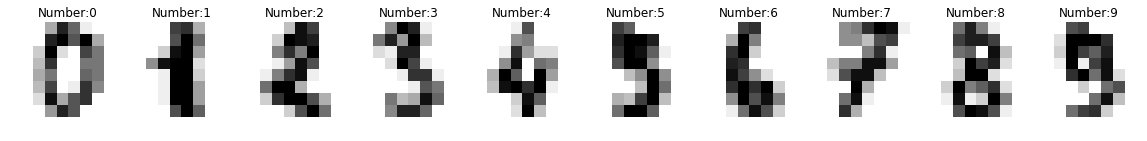

In [2]:
# 分析対象データ
from sklearn.datasets import load_digits

digits = load_digits()

# 画像の表示
plt.figure(figsize=(20,5))
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(1,10,label+1)
    plt.axis('off')
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Number:{0}'.format(label))

## 15.3 総合演習問題（2）
キーワード：教師あり学習、回帰、複数モデルの比較

以下のデータを読み込み、アワビの年齢を予測するモデルを構築してみましょう。目的変数は、「`Rings`」になります。 英語ですが参考URL「B-26」に参考情報を挙げてあります。

http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

## 15.4 総合演習問題（3）
キーワード：教師あり学習、分類、マーケティング分析、検証、混同行列、正解率、適合率、再現率、F1スコア、ROC曲線、AUC

12章で扱った、以下の金融機関のデータ（bank-full.csv）を読み込んで、後の問いに答えてください。

http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

1.  数値データ（`age,balance,day,duration,campaign,pdays,previous`）における基本統計量（レコード数、最大値、最小値、標準偏差など）を算出してください。  
2.  データの`"job","marital","education","default","housing","loan"`のそれぞれについて、預金を申し込む人、申し込まない人の人数を算出してください。　　
3.   `y`（預金を申し込む、申し込まない）を目的変数として、予測モデルを構築してください。モデルは複数（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレストなど）を試してください。ただし、テスト用にデータはあらかじめ抜いてください（その際、`train_test_split`のパラメータは`random_state=0`で設定してください）。     
4.   テスト用のデータを使って、それぞれのモデルの検証をしましょう。各モデルのテストデータにおける正解率、適合率、再現率、F1スコア、混同行列を表示してください。どのモデルを使いますか。  
5.   それぞれのモデルのROC曲線を描いて、AUCを算出し、比較できるようにしてください。

## 15.5 総合演習問題（4）
キーワード：教師あり学習、教師なし学習、ハイブリッドアプローチ

11章で扱ったload_breast_cancerを使って、さらに予測精度（正解率）を上げるモデルを作成してみましょう。同じく、テスト用にデータはあらかじめ抜いて検証してください。その際、`train_test_split`のパラメータが`random_state=0`に設定してください。   

In [42]:
# 前回の解答
# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

In [43]:
# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

pred_y = clf.predict(X_test_std)
confusion_m = confusion_matrix(y_test,pred_y)

print("Confution matrix:\n{}".format(confusion_m))

train: LogisticRegression 0.990610328638
test: LogisticRegression 0.958041958042
Confution matrix:
[[50  3]
 [ 3 87]]


データを標準化して、単純にモデルを当てはめるとテストデータで正解率95.8％でした。この結果を上回る方法を考えてみてください。

## 15.6 総合演習問題（5）
キーワード：時系列データ、欠損データの補完、シフト、ヒストグラム、教師あり学習

以下のように、2001年1月2日から2016年12月30日までの為替データ（ドル/円レートのJPYUSDとユーロ/ドルレートのUSDEUR）を読み込み、問いに答えてください。なお、DEXJPUSとDEXUSEUがそれぞれJPYUSDとUSDEURに想定しています。

1. 読み込んだデータには、祝日や休日等による欠損（NaN）があります。その補完処理をするために、直近の前の日におけるデータで補完してください。ただし年月のデータがない場合もありますので、その場合、今回は無視してください（改めて日付データを作成して、分析をすることも可能ですが、今回はこのアプローチはとりません。）。  
2. 上記のデータで、各統計量の確認と時系列のグラフ化をしてください。  
3. 当日と前日における差分をとり、それぞれの変化率（当日-前日）/前日のデータをヒストグラムで表示してください。　　  
4. 将来の価格（例：次の日）を予測するモデルを構築してみましょう。具体的には、2016年11月を訓練データとして、当日の価格を目的変数として、前日、前々日、3日前の価格データを使ってモデル（線形回帰）を構築し、2016年12月をテストデータとして、検証してください。また、他の月や年で実施すると、どんな結果になりますか。  

まず、以下を実行して、データをダウンロードしてください。


In [ ]:
!pip install pandas-datareader

以下で、対象となる期間の為替データを読み込みます。

In [14]:
import pandas_datareader.data as pdr

start_date = "2001-01-02"
end_date = "2016-12-30"

fx_jpusdata = pdr.DataReader("DEXJPUS","fred",start_date,end_date)
fx_useudata = pdr.DataReader("DEXUSEU","fred",start_date,end_date)

## 15.7 総合演習問題（6）
キーワード：時系列データ、回帰分析

以下の米国の旅客飛行機のフライトデータ」を取得し、読み込んで以下の問いに答えてください。ただし、今回は1980年代を分析対象とします。（PCのスペックがある方は、すべてのデータを対象にしてください。）

http://stat-computing.org/dataexpo/2009/the-data.html



1. データを読み込んだ後は、年（Year）×月（Month）の平均の出発遅延時間（DepDelay）を算出してください。何かわかることはありますか。  
2. 1で算出したデータについて、1月から12月までの結果を時系列の折れ線グラフにしてください。その時、年ごとに比較できるように、1つのグラフにまとめてください。1987年から1989年までのデータについて、それぞれの時系列グラフが並ぶイメージです。

3. 各航空会社（UniqueCarrier）ごとの平均遅延時間を算出してください。また、出発地（Origin）、目的地（Dest）を軸にして、平均遅延時間を算出してください。  
4. 遅延時間を予測するための予測モデルを構築します。目的変数をDepDelay、説明変数をArrDelay（実際の到着時間？）とDistance（飛行距離？）にして、モデルを構築しましょう。

>**[ヒント]**
>
>データの取得は、以下のスクリプトを参考に、実装と実行をしてください。ただし、以下を実行する場合は別ファイルとして、「ファイル名.sh」の形式で保存し、そのファイルをここで実行する場合は、「bash ファイル名.sh」で実行します。もしくは、terminalに移動し、専用のディレクトリなどを作って、スクリプトを実行して、データを取得してください。他、Pythonから取得する方法もありますし、以前はzipを展開してデータを読み込んでいましたが、zipのまま加工できるプログラムも書けますので、ぜひ調べてやってみてください。**なお、データのダウンロードにとても時間がかかりますので、注意しましょう。**

In [ ]:
#ヒント
#参考シェルスクリプト：

#!/bin/sh

for year in {1987..1999} ; do  
    echo ¥$year  
    wget http://stat-computing.org/dataexpo/2009/${year}.csv.bz2  
    bzip2 -d ${year}.csv.bz2  
done  

なお、上記はLinuxやMacの環境の方のみで、Windowsの方は以下のようなスクリプトで圧縮ファイルをダウンロードして解凍してください。

In [ ]:
import urllib.request

for year in range(1987,2000):    
    url = 'http://stat-computing.org/dataexpo/2009/'
    savename = str(year) + '.csv.bz2'
    
    #ダウンロード 
    urllib.request.urlretrieve(url + savename, savename)
    print('{}年のファイルを保存しました'.format(year))

## 15.8 参考：今後のデータ分析に向けて

以下は参考ですが、次のようなオープンデータを使って、データ分析に取り組んでみましょう。課題は明確になっていませんが、その課題を見つけることもデータ分析では大事です。

1. どのデータを分析対象にしますか？また、どんなことを目的にデータを分析しますか？どんなことをゴールにしますか？    
2. 分析対象となるデータに何か特徴や傾向はありますか？簡易集計してみましょう。そこからどんな仮設を立てますか？  
3. 目的や仮説等が明確になったら、どんな風にアプローチしますか？実装して、検証してください。  
4. 分析に明るくない人たち（中学校までの数学しかわからないと想定）に今回の分析結果を報告するとして、どのような報告書（グラフやインサイトなど含む）を作成しますか？

なお、課題を特定していくことの重要性については、参考書籍「A-37」も参考になりますので、興味のある方は読んでみてください。

##### データソースサンプル

- UCI DATA

http://archive.ics.uci.edu/ml/

- Bay Area Bike Share

http://www.bayareabikeshare.com/open-data
　　
- movielens

http://grouplens.org/datasets/movielens/


- MLDATA

http://mldata.org/

- Churn Data Set（provided by IBM）

https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv

- Netflix Prize Data Set　　

http://academictorrents.com/details/9b13183dc4d60676b773c9e2cd6de5e5542cee9a　　

上記のほかにも、Kaggleなどのデータサイエンスのコンテストなどがありますので、スキルを上げていきたい方はチャレンジしてみてください。課題を提出するまでにいたらなくとも、Discussionなどで色々な人が自分たちの手法やアプローチを紹介したりしていますので、データ分析を学ぶ上でとても参考になります。